In [19]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from time import perf_counter as T
sns.set_style("white")





def D(prices,  C,  i):
    if (C == 0):
        return 1
    if (i >= len(prices)):
        return 0

    if (prices[i] > C):
        return D(prices, C, i + 1)

    _self = D(prices, C - prices[i], i + 1)
    _next = D(prices, C, i + 1)

    return _self + _next

def D_dynamic(prices,  C,  i):
    if memory[C,i] >= 0:
        return memory[C,i]

    if (C == 0):
        memory[C,i] = 1
        return memory[C,i]
    if (i >= len(prices)):
        memory[C,i] = 0
        return memory[C,i]

    if (prices[i] > C):
        memory[C,i] = D_dynamic(prices, C, i + 1)
        return memory[C,i]

    _self = D_dynamic(prices, C - prices[i], i + 1)
    _next = D_dynamic(prices, C, i + 1)
    memory[C,i] = _self + _next
    return memory[C,i]


In [31]:
n = 9

times = np.empty((n,2))

for N in range(n):
    prices = np.ceil(np.random.random(10*(N+1))*10).astype(int)
    C = 15
    memory = -np.ones((C + 1,len(prices)+1))
    
    t = T()
    D(prices,C,0)
    times[N,0] = T() - t
    
    t = T()
    D_dynamic(prices,C,0)
    times[N,1] = T() - t
    
    

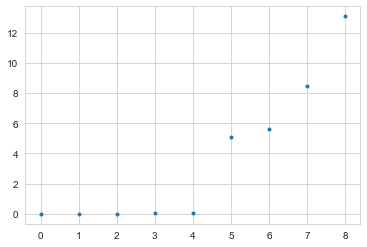

In [37]:
plt.plot(times[:,0],'.')
# plt.plot(times[:,1],'.')